#**Problem 1**

Come up with handcrafted features for the MNIST digit classificiation problem and use them in a simple model consisting of a single dense layer with softmax activation. 

Let x be the matrix representing a image of a MNIST digit.  Let vec(x) denote the flattened matrix x.

Your baseline model is the simple model that takes only vec(x) as input. The goal is to improve the accuracy of the simple model by augmenting the input vec(x) with hand-crafted features.  

Say, f1, f2, ..., fm are your hand-crafted features. The augmented input vector is then obtained by stacking vec(x) and the vector (f1, f2, ..., fm).  You can use the numpy command ```np.concatentate``` to stack vectors.

The features could be: 

- width of digit (normalized to be in the range (0, 1)
- height of digit (normalized to be in the range (0, 1)
- number of white regions (a typical 8 has three, a typical 6 has two components, and 2 has 1), average intensity, etc. 
- note the you can one-hot encode the number of connected components as follows: b1 = 1 iff num = 1, b2 = 1 if num = 2, b3 = 1 if num = 3, and b = 1 if num = 0 or num >= 4 (the latter case should normally not occur for well-formed digits); this is probably better than have just a single feature num / 3.

The problem of computing the number of independent white regions is a basic problem for job interviews. It boils down to computing connected components of the following graph. The vertices of the graph correspond to the pixels and are denoted by (i, j), which is the position of the pixel. Two vertices (i, j) and (i', j') are connected iff |i - i'| <= 1 and |j - j'| <= 1.  If a pixel at position (i, j) is black, then remove it together with its edges.

You have to compute the number of connected components for the 60 thousand images. So make sure that your code is efficient.

In [0]:
# Import libraries
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [0]:
def get_max_distance(img):
  left_edge = np.argmax(np.argmax(img, axis=0))
  right_edge = np.argmax(np.argmax(np.flip(img, 1), axis=0))
  return right_edge - left_edge

def handcraft_features(img):
  # Get the width of the max values
  width = get_max_distance(img)
  # Flip the image and get the height
  height = get_max_distance(np.rot90(img, axes=(-2,-1)))

  return np.concatenate([img.flatten(), [width,], [height,]])
  
def plot_loss(epochs, train_loss, test_loss):
  plt.plot(epochs, train_loss, 'bo', label='Training loss')
  plt.plot(epochs, test_loss, 'ro', label='Test loss')
  plt.title('Training and test loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

def plot_accuracy(epochs, train_acc, test_acc):
  plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
  plt.plot(epochs, test_acc, 'ro', label='Test accuracy')
  plt.title('Training and test accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

## Model with Handcrafted Features

In [0]:
# Flatten all the images
new_input = np.zeros((len(train_images), (len(train_images[0]) ** 2) + 2))
new_test = np.zeros((len(test_images), (len(test_images[0]) ** 2) + 2))

for i in range(len(train_images)):
  new_input[i] = handcraft_features(train_images[i])
for i in range(len(test_images)):
  new_test[i] = handcraft_features(test_images[i])

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(28*28 + 2,), activation=tf.nn.softmax)
])

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [87]:
# train the model
epochs = 20
history = model.fit(new_input, 
                      train_labels,
                      epochs=epochs,
                      validation_data=(new_test, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 95us/sample - loss: 9.6568 - acc: 0.8411 - val_loss: 6.0786 - val_acc: 0.8796
Epoch 2/20
60000/60000 [==============================] - 6s 93us/sample - loss: 6.2185 - acc: 0.8767 - val_loss: 5.4714 - val_acc: 0.8952
Epoch 3/20
60000/60000 [==============================] - 6s 92us/sample - loss: 5.7116 - acc: 0.8796 - val_loss: 4.9185 - val_acc: 0.8973
Epoch 4/20
60000/60000 [==============================] - 6s 93us/sample - loss: 5.4760 - acc: 0.8835 - val_loss: 5.0914 - val_acc: 0.8947
Epoch 5/20
60000/60000 [==============================] - 6s 92us/sample - loss: 5.3335 - acc: 0.8837 - val_loss: 6.4645 - val_acc: 0.8601
Epoch 6/20
60000/60000 [==============================] - 6s 93us/sample - loss: 5.2681 - acc: 0.8849 - val_loss: 5.3937 - val_acc: 0.8798
Epoch 7/20
60000/60000 [==============================] - 6s 94us/sample - loss: 5.2051 - acc: 0.8842 - val_loss: 5.

In [88]:
test_loss, test_acc = model.evaluate(new_test, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 59us/sample - loss: 5.2123 - acc: 0.9010
Test accuracy: 0.901


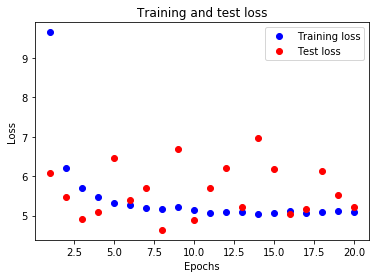

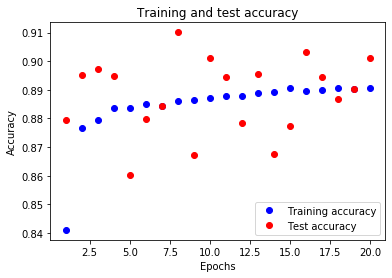

In [90]:
history_dict = history.history
epochs_range = range(1, epochs+1)

plot_loss(epochs_range, history_dict['loss'], history_dict['val_loss'])
plot_accuracy(epochs_range, history_dict['acc'], history_dict['val_acc'])

## Single softmax dense layer
(no handcrafted features)

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [99]:
# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels,
                      epochs=epochs,
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 95us/sample - loss: 9.6783 - acc: 0.8382 - val_loss: 7.8994 - val_acc: 0.8480
Epoch 2/20
60000/60000 [==============================] - 6s 92us/sample - loss: 6.2965 - acc: 0.8761 - val_loss: 5.9238 - val_acc: 0.8816
Epoch 3/20
60000/60000 [==============================] - 6s 94us/sample - loss: 5.7438 - acc: 0.8786 - val_loss: 5.5596 - val_acc: 0.8887
Epoch 4/20
60000/60000 [==============================] - 6s 93us/sample - loss: 5.5332 - acc: 0.8825 - val_loss: 5.3609 - val_acc: 0.8914
Epoch 5/20
60000/60000 [==============================] - 6s 94us/sample - loss: 5.3481 - acc: 0.8834 - val_loss: 5.9668 - val_acc: 0.8757
Epoch 6/20
60000/60000 [==============================] - 6s 93us/sample - loss: 5.3067 - acc: 0.8847 - val_loss: 5.7664 - val_acc: 0.8828
Epoch 7/20
60000/60000 [==============================] - 6s 93us/sample - loss: 5.2270 - acc: 0.8880 - val_loss: 5.

In [102]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 61us/sample - loss: 5.9642 - acc: 0.8816
Test accuracy: 0.8816


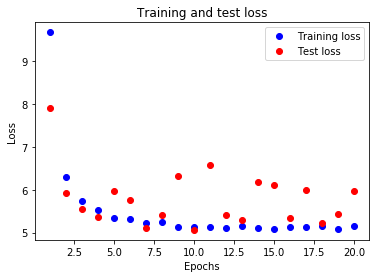

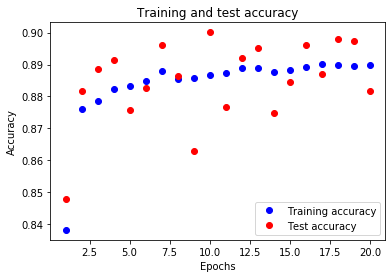

In [103]:
history_dict = history.history
epochs_range = range(1, epochs+1)

plot_loss(epochs_range, history_dict['loss'], history_dict['val_loss'])
plot_accuracy(epochs_range, history_dict['acc'], history_dict['val_acc'])